# Market Segmentation

## Import Relevant Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the dataset

In [15]:
df = pd.read_csv('example.csv')
df.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


## Plot the data

Text(0, 0.5, 'Loyalty')

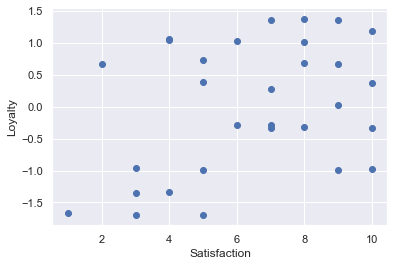

In [16]:
plt.scatter(df['Satisfaction'],df['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Clustering

In [17]:
x = df.copy()

In [18]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

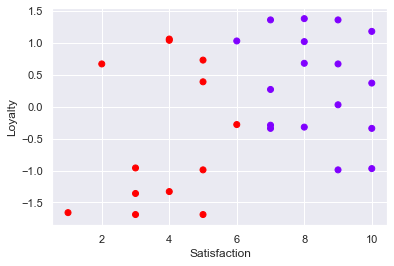

In [20]:
plt.scatter(df['Satisfaction'],df['Loyalty'],c=clusters['cluster_pred'],cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Here we can see that the clusters are distributed along the line ***Satisfaction = 6***. Moreover, this analysis have disregarded Loyalty as a feature to make cluster. So to overcome this, standardization is performed. 

## Standardization

In [21]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Elbow Method

In [22]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.404966601614363,
 4.337110750237059,
 3.797868137669906]

Text(0, 0.5, 'WCSS')

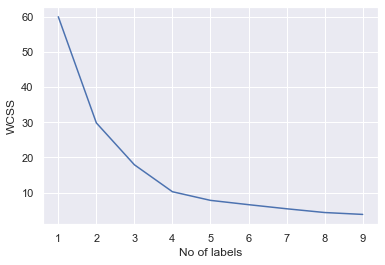

In [23]:
plt.plot(range(1,10),wcss)
plt.xlabel('No of labels')
plt.ylabel('WCSS')

By observing the above graph, we can determine that k can be *2,3,4 and 5*.

## Kmeans with different values

In [24]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster']=kmeans_new.fit_predict(x_scaled)

In [25]:
cluster_new.head()

,Satisfaction,Loyalty,cluster
0,4,-1.33,3
1,6,-0.28,2
2,5,-0.99,3
3,7,-0.29,2
4,4,1.06,0


Text(0, 0.5, 'Loyalty')

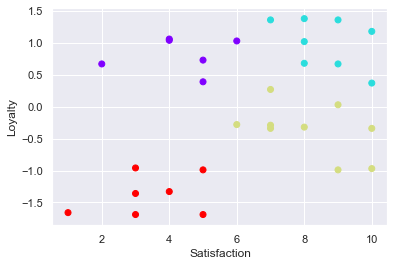

In [27]:
plt.scatter(df['Satisfaction'],df['Loyalty'],c=cluster_new['cluster'],cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Thus, after performing cluster analysis for **$k = 2,3,4 and 5 $**, we can finalize that $k= 4$ is the best cluster.

So our four clusters are:
<ul>
    <li><b>Cluster 1 :** Customers with low satisfaction and low loyalty. Usually these groups are targeted at the end to make them use the brand more. </li>
    <li>**Cluster 2 :** Customers with low satisfaction and high loyalty. They are the supporters of the brand. Even though they are not satisfied by the services, they are loyal. These groups can be targeted by taking their feedback and increasing their satisfaction.</li>
    <li>**Cluster 3 :** Customers with high satisfaction and low loyalty. These groups are also refered as the roamers. Even though they are satisfied by the services provided, they are not loyal to the brand. Their loyalty can be increased by providing coupons and loyalty cards.</li>
    <li>**Cluster 4 :** Customers with high satisfaction and high loyalty. They are the fans of the brand.</li>
</ul>

<br>Basically, this analysis is performed to convert all the customers to cluster 4 for the benefit of the brand.